In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
activities = pd.read_csv('activity_data.csv')

<AxesSubplot:ylabel='Frequency'>

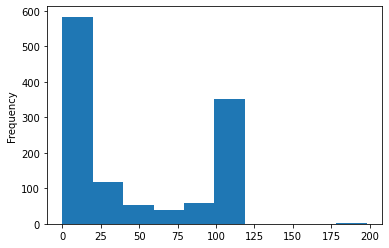

In [3]:
activities['f_avg_IC50'].plot(kind='hist')

In [4]:
actives   = activities.query('f_avg_IC50 <= 10')[['SMILES','CID']]
actives['LABEL']=1
inactives = activities.query('f_avg_IC50 > 10')[['SMILES','CID']]
inactives['LABEL']=0

In [5]:
data = pd.concat([actives,inactives])
data[['SMILES','CID']].to_csv('smiles.smi')

In [6]:
from rdkit import Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

mols = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]

In [7]:
# Get list of descriptors
descriptors_list = [a[0] for a in Chem.Descriptors.descList]
calculator = MolecularDescriptorCalculator(descriptors_list)
calc_descriptors = [calculator.CalcDescriptors(m) for m in mols]

In [8]:
df = pd.DataFrame(calc_descriptors, columns=descriptors_list)

In [9]:
df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.135814,-1.022707,14.135814,0.116928,0.308873,555.075,519.795,554.229598,208,0,...,0,0,0,0,0,0,0,0,0,0
1,13.490509,-3.779742,13.490509,0.010989,0.587016,485.993,461.801,485.117605,172,0,...,0,1,0,0,0,0,0,0,0,0
2,14.256120,-1.003594,14.256120,0.144602,0.273005,592.100,557.828,591.236080,220,0,...,0,0,0,0,0,0,0,0,0,0
3,13.843030,-0.460244,13.843030,0.198219,0.510128,450.905,430.745,450.137115,162,0,...,0,0,0,0,0,0,0,0,0,0
4,14.125541,-0.910110,14.125541,0.139021,0.353783,533.032,503.800,532.198966,196,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Compute the correlation matrix
corr = df.corr().abs()

# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Create correlation matrix

# Select upper triangle of correlation matrix
value=0.5
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than "value"
to_drop = [column for column in upper.columns if any(upper[column] > value)]

# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

In [11]:
df.head()

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_MRLOW,BalabanJ,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.135814,-1.022707,0.116928,0,0.407416,-0.493219,35.495692,9.743588,-0.122147,1.591030,...,1,0,0,0,0,0,0,0,0,0
1,13.490509,-3.779742,0.010989,0,0.232833,-0.391723,35.495692,9.897554,-0.117524,1.496747,...,1,0,0,0,0,0,0,0,0,0
2,14.256120,-1.003594,0.144602,0,0.407477,-0.493219,35.495693,9.743836,-0.122146,1.387895,...,1,0,0,0,0,0,0,0,0,0
3,13.843030,-0.460244,0.198219,0,0.232793,-0.323637,35.495692,9.884614,-0.117949,1.459156,...,1,0,0,0,0,0,0,0,0,0
4,14.125541,-0.910110,0.139021,0,0.236165,-0.493219,35.495692,9.743927,-0.122140,1.246528,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

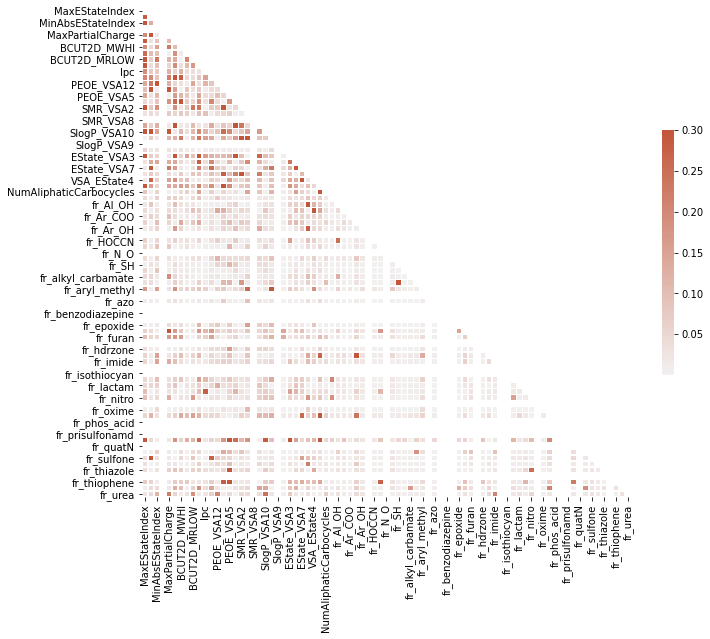

In [12]:
# Re-Compute the correlation matrix
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
corr.sort_values('MaxEStateIndex',ascending=False)

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_MRLOW,BalabanJ,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
MaxEStateIndex,1.000000,0.288128,0.354499,NaN,0.197614,0.289142,0.192130,0.253686,0.376087,0.397735,...,0.358378,NaN,0.002312,0.042446,0.036048,0.039252,NaN,0.070937,0.005434,0.018979
SlogP_VSA10,0.416684,0.381285,0.145380,NaN,0.447391,0.020996,0.102068,0.037724,0.107837,0.201520,...,0.290975,NaN,0.005310,0.016322,0.016580,0.073060,NaN,0.073112,0.140633,0.244492
EState_VSA3,0.416626,0.073871,0.057051,NaN,0.025688,0.467608,0.054900,0.153194,0.089840,0.366895,...,0.301034,NaN,0.001404,0.008357,0.034970,0.004549,NaN,0.119927,0.084768,0.075816
BalabanJ,0.397735,0.039803,0.089929,NaN,0.055052,0.195982,0.038078,0.107222,0.172537,1.000000,...,0.257256,NaN,0.047148,0.007951,0.063134,0.062813,NaN,0.021606,0.182771,0.018268
BCUT2D_MRLOW,0.376087,0.068297,0.230886,NaN,0.118315,0.135875,0.000866,0.202939,1.000000,0.172537,...,0.116781,NaN,0.043489,0.083583,0.019905,0.062352,NaN,0.025393,0.063353,0.186727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_phos_acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_phos_ester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_prisulfonamd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_quatN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.insert(0, column='CID', value=data['CID'].tolist())
df.insert(0, column='LABEL', value=data['LABEL'].tolist())

In [15]:
df.head()

,LABEL,CID,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,MAT-POS-61f37a1a-1,14.135814,-1.022707,0.116928,0,0.407416,-0.493219,35.495692,9.743588,...,1,0,0,0,0,0,0,0,0,0
1,1,MAT-POS-61f37a1a-2,13.490509,-3.779742,0.010989,0,0.232833,-0.391723,35.495692,9.897554,...,1,0,0,0,0,0,0,0,0,0
2,1,MAT-POS-61f37a1a-4,14.256120,-1.003594,0.144602,0,0.407477,-0.493219,35.495693,9.743836,...,1,0,0,0,0,0,0,0,0,0
3,1,MAT-POS-61f37a1a-5,13.843030,-0.460244,0.198219,0,0.232793,-0.323637,35.495692,9.884614,...,1,0,0,0,0,0,0,0,0,0
4,1,MAT-POS-61f37a1a-7,14.125541,-0.910110,0.139021,0,0.236165,-0.493219,35.495692,9.743927,...,1,0,0,0,0,0,0,0,0,0


In [16]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 0].values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[127  16]
 [ 34  64]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       143
           1       0.80      0.65      0.72        98

    accuracy                           0.79       241
   macro avg       0.79      0.77      0.78       241
weighted avg       0.79      0.79      0.79       241

0.7925311203319502


In [21]:
# Just checking the Training set
x_pred = classifier.predict(X_train)
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))
print(accuracy_score(y_train,x_pred))

[[539  28]
 [  4 393]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       567
           1       0.93      0.99      0.96       397

    accuracy                           0.97       964
   macro avg       0.96      0.97      0.97       964
weighted avg       0.97      0.97      0.97       964

0.966804979253112


In [22]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2074688796680498
Mean Squared Error: 0.2074688796680498
Root Mean Squared Error: 0.45548751867427695


In [23]:
def run_classifier(n) :
    classifier = RandomForestClassifier(n_estimators=n, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [24]:
rmse=[]
for n in [5,10,20,50,100,200]:
    rmse.append([n,run_classifier(n)])

<AxesSubplot:xlabel='0'>

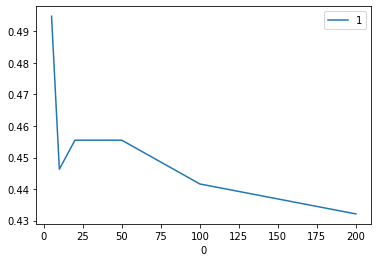

In [25]:
pd.DataFrame(rmse).plot(x=0,y=1)

/Users/dgomes/miniconda3/envs/modmol/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


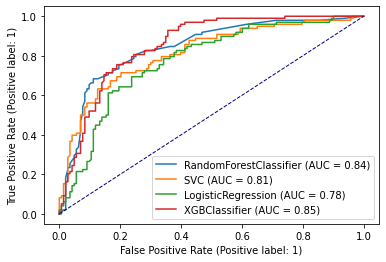

In [26]:
# ROC
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)
svc_disp = plot_roc_curve(svc, X_test, y_test, ax=ax)
reg_disp = plot_roc_curve(reg, X_test, y_test, ax=ax)
xgb_disp = plot_roc_curve(xgb, X_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.show()

In [27]:
# Use score method to get accuracy of model
print(f'''
 RF {rfc.score(X_test, y_test)}
 LR {reg.score(X_test, y_test)}
SVC {svc.score(X_test, y_test)}
XGB {xgb.score(X_test, y_test)}
''')


 RF 0.7925311203319502
 LR 0.7344398340248963
SVC 0.7551867219917012
XGB 0.7759336099585062



In [28]:
# make predictions for test data
y_pred = rfc.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(" RF - Accuracy: %.2f%%" % (accuracy * 100.0))

# make predictions for test data
y_pred = reg.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(" LR - Accuracy: %.2f%%" % (accuracy * 100.0))

# make predictions for test data
y_pred = svc.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("SVC - Accuracy: %.2f%%" % (accuracy * 100.0))

# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("XGB - Accuracy: %.2f%%" % (accuracy * 100.0))

 RF - Accuracy: 79.25%
 LR - Accuracy: 73.44%
SVC - Accuracy: 75.52%
XGB - Accuracy: 77.59%


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc.predict(X_test)))
print(classification_report(y_test,reg.predict(X_test)))
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       143
           1       0.82      0.63      0.71        98

    accuracy                           0.79       241
   macro avg       0.80      0.77      0.78       241
weighted avg       0.80      0.79      0.79       241

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       143
           1       0.69      0.62      0.66        98

    accuracy                           0.73       241
   macro avg       0.73      0.72      0.72       241
weighted avg       0.73      0.73      0.73       241

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       143
           1       0.77      0.57      0.65        98

    accuracy                           0.76       241
   macro avg       0.76      0.73      0.73       241
weighted avg       0.76      0.76      0.75       241



In [30]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]

In [31]:
import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


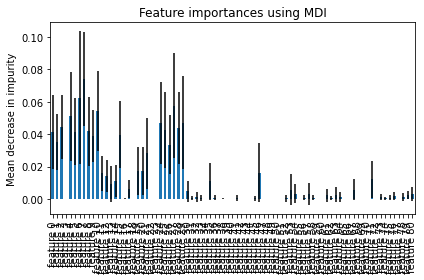

In [32]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [33]:
X.shape[1]

81